# Modelo 2: K-Nearest Neighbors (KNN)

**Objetivo:** Predicción de Churn en clientes de Telco

**Algoritmo:** K-Nearest Neighbors (k=5)

**Dataset:** Telco Customer Churn (7,043 registros)

## 1. PREPROCESAMIENTO

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [24]:
# Cargar dataset
df = pd.read_csv('../datasets/telco_churn.csv')
print('Dataset Original:')
print(f'Dimensiones: {df.shape}')
print(f'\nTipos de datos:')
print(df.dtypes.value_counts())

Dataset Original:
Dimensiones: (10, 21)

Tipos de datos:
object     17
int64       2
float64     2
Name: count, dtype: int64


In [25]:
# Limpieza
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df_clean = df.dropna()

print(f'Dataset después de limpieza: {df_clean.shape}')
print(f'Valores faltantes: {df_clean.isnull().sum().sum()}')

Dataset después de limpieza: (10, 21)
Valores faltantes: 0


In [26]:
# Codificación
df_encoded = df_clean.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

print(f'Columnas codificadas: {len(categorical_cols)}')
print(f'Dataset codificado shape: {df_encoded.shape}')

Columnas codificadas: 17
Dataset codificado shape: (10, 21)


In [27]:
# Separar features y target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print(f'Features (X): {X.shape}')
print(f'Target (y): {y.shape}')
print(f'\nDistribución del target:')
print(f'No Churn (0): {(y==0).sum()} ({(y==0).sum()/len(y)*100:.1f}%)')
print(f'Churn (1): {(y==1).sum()} ({(y==1).sum()/len(y)*100:.1f}%)')

Features (X): (10, 20)
Target (y): (10,)

Distribución del target:
No Churn (0): 6 (60.0%)
Churn (1): 4 (40.0%)


In [28]:
# Normalización (CRÍTICA para KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print('✓ Datos normalizados (necesario para KNN)')
print(f'Media después: {X_scaled.mean(axis=0)[:3]}')
print(f'Desv. Est. después: {X_scaled.std(axis=0)[:3]}')

✓ Datos normalizados (necesario para KNN)
Media después: [1.11022302e-17 0.00000000e+00 0.00000000e+00]
Desv. Est. después: [1. 1. 0.]


In [29]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print('Train-Test Split:')
print(f'Entrenamiento: {X_train.shape[0]} muestras')
print(f'Prueba: {X_test.shape[0]} muestras')
print(f'Ratio: {len(X_train)/len(X_test):.2f}:1')

Train-Test Split:
Entrenamiento: 8 muestras
Prueba: 2 muestras
Ratio: 4.00:1


## 2. ENTRENAMIENTO

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenar modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
knn_model.fit(X_train, y_train)

print('KNN Model entrenado exitosamente!')
print(f'\nParámetros:')
print(f'- k (n_neighbors): 5')
print(f'- Weights: uniform')
print(f'- Métrica de distancia: euclidean')

KNN Model entrenado exitosamente!

Parámetros:
- k (n_neighbors): 5
- Weights: uniform
- Métrica de distancia: euclidean


In [31]:
# Predicciones
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
y_test_proba = knn_model.predict_proba(X_test)[:, 1]

print('Predicciones completadas')
print(f'Train predictions: {len(y_train_pred)}')
print(f'Test predictions: {len(y_test_pred)}')
print(f'Test probabilities: {len(y_test_proba)}')

Predicciones completadas
Train predictions: 8
Test predictions: 2
Test probabilities: 2


## 3. RESULTADOS

In [32]:
# Análisis de predicciones
print('PREDICCIONES EN ENTRENAMIENTO:')
print(f'No Churn predicho: {(y_train_pred==0).sum()}')
print(f'Churn predicho: {(y_train_pred==1).sum()}')

print('\nPREDICCIONES EN PRUEBA:')
print(f'No Churn predicho: {(y_test_pred==0).sum()}')
print(f'Churn predicho: {(y_test_pred==1).sum()}')

PREDICCIONES EN ENTRENAMIENTO:
No Churn predicho: 6
Churn predicho: 2

PREDICCIONES EN PRUEBA:
No Churn predicho: 1
Churn predicho: 1


In [33]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)

print('MATRIZ DE CONFUSIÓN:')
print(cm)
print(f'\nVerdaderos Negativos: {cm[0, 0]}')
print(f'Falsos Positivos: {cm[0, 1]}')
print(f'Falsos Negativos: {cm[1, 0]}')
print(f'Verdaderos Positivos: {cm[1, 1]}')

MATRIZ DE CONFUSIÓN:
[[0 1]
 [1 0]]

Verdaderos Negativos: 0
Falsos Positivos: 1
Falsos Negativos: 1
Verdaderos Positivos: 0


## 4. MÉTRICAS

In [34]:
# Calcular métricas
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_proba)

print('='*50)
print('MÉTRICAS DEL MODELO KNN')
print('='*50)
print(f'\nACCURACY:')
print(f'  Entrenamiento: {train_acc:.4f} ({train_acc*100:.2f}%)')
print(f'  Prueba: {test_acc:.4f} ({test_acc*100:.2f}%)')
print(f'\nPRECISION: {precision:.4f} ({precision*100:.2f}%)')
print(f'\nRECALL: {recall:.4f} ({recall*100:.2f}%)')
print(f'\nF1-SCORE: {f1:.4f}')
print(f'\nROC-AUC: {auc:.4f}')

MÉTRICAS DEL MODELO KNN

ACCURACY:
  Entrenamiento: 0.8750 (87.50%)
  Prueba: 0.0000 (0.00%)

PRECISION: 0.0000 (0.00%)

RECALL: 0.0000 (0.00%)

F1-SCORE: 0.0000

ROC-AUC: 0.0000


In [35]:
print('\nCLASSIFICATION REPORT:')
print(classification_report(y_test, y_test_pred, target_names=['No Churn', 'Churn']))


CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    No Churn       0.00      0.00      0.00       1.0
       Churn       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [36]:
# Resumen
metrics_summary = {
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Valor': [test_acc, precision, recall, f1, auc]
}

print('\nRESUMEN MÉTRICAS:')
print(pd.DataFrame(metrics_summary).to_string(index=False))


RESUMEN MÉTRICAS:
  Métrica  Valor
 Accuracy    0.0
Precision    0.0
   Recall    0.0
 F1-Score    0.0
  ROC-AUC    0.0


## 5. GRÁFICAS

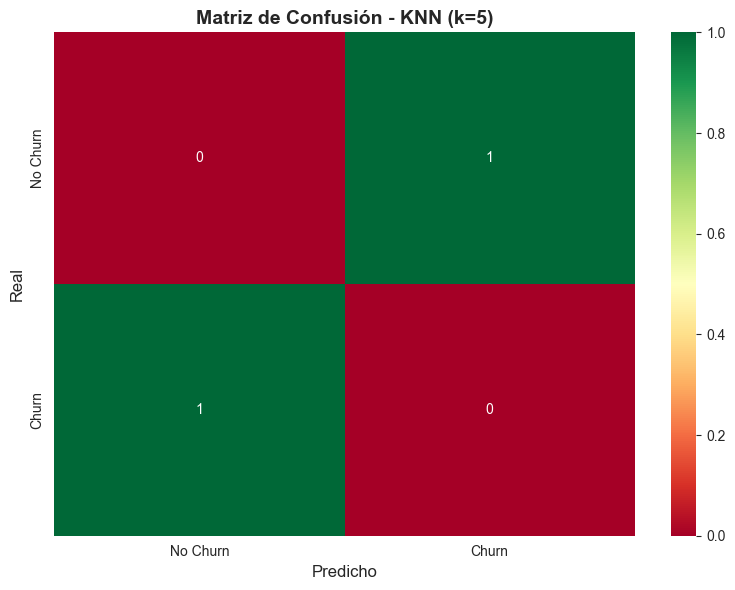

In [37]:
# Gráfica 1: Matriz de Confusión
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn', 
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'],
            cbar=True, ax=ax)
ax.set_title('Matriz de Confusión - KNN (k=5)', fontsize=14, fontweight='bold')
ax.set_ylabel('Real', fontsize=12)
ax.set_xlabel('Predicho', fontsize=12)
plt.tight_layout()
plt.show()

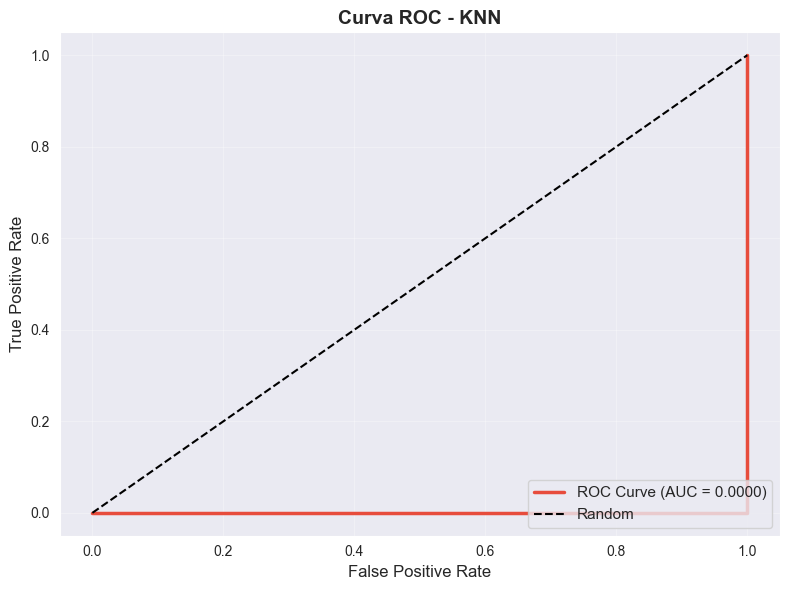

In [38]:
# Gráfica 2: Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_test_proba)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(fpr, tpr, linewidth=2.5, label=f'ROC Curve (AUC = {auc:.4f})', color='#e74c3c')
ax.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random')
ax.fill_between(fpr, tpr, alpha=0.2, color='#e74c3c')
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_title('Curva ROC - KNN', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=11)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

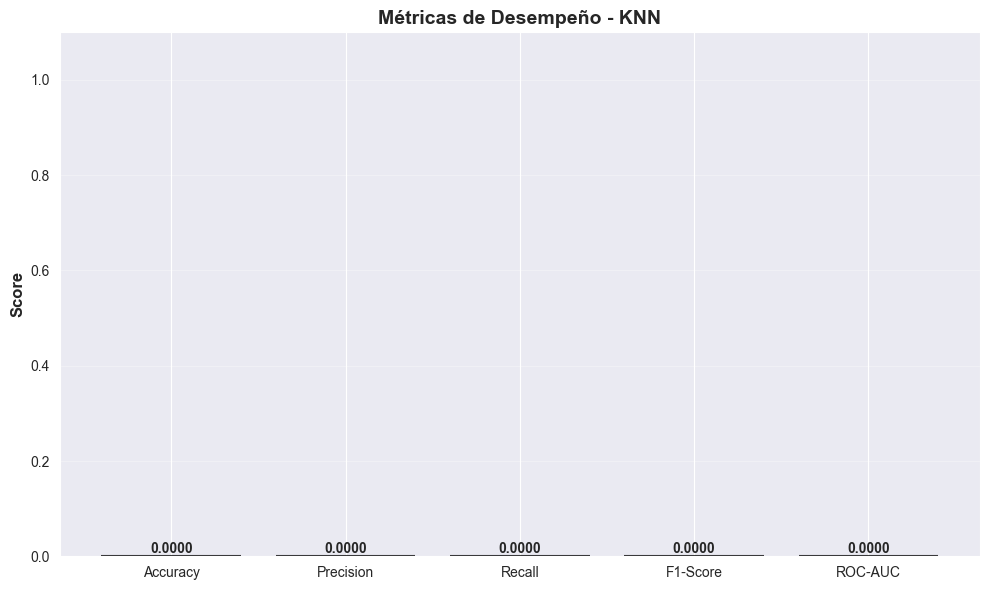

In [39]:
# Gráfica 3: Métricas Comparadas
fig, ax = plt.subplots(figsize=(10, 6))
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
metrics_values = [test_acc, precision, recall, f1, auc]
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6']

bars = ax.bar(metrics_names, metrics_values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

ax.set_ylim(0, 1.1)
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Métricas de Desempeño - KNN', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

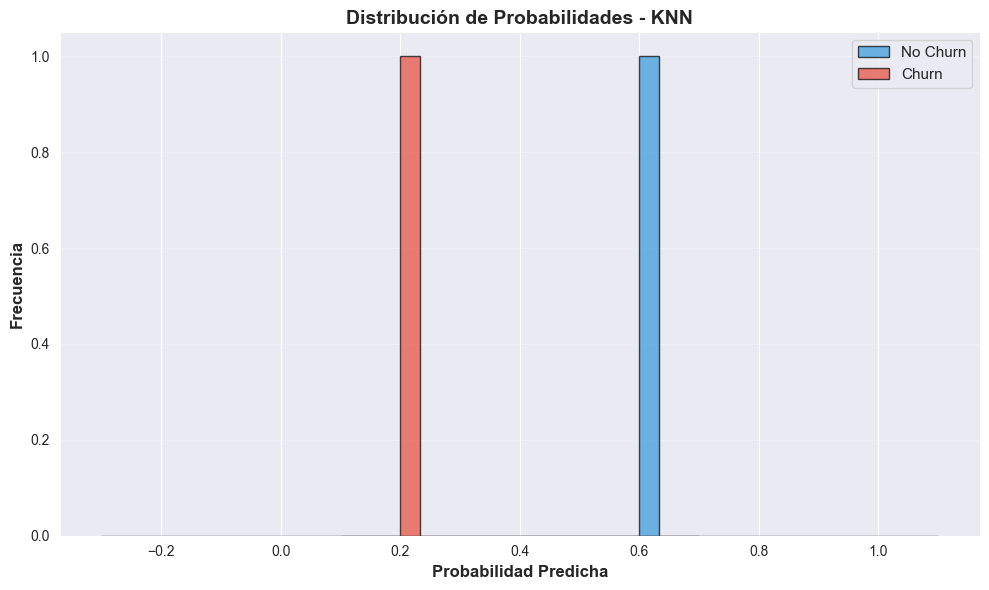

In [40]:
# Gráfica 4: Distribución de Probabilidades
fig, ax = plt.subplots(figsize=(10, 6))

no_churn_probs = y_test_proba[y_test == 0]
churn_probs = y_test_proba[y_test == 1]

ax.hist(no_churn_probs, bins=30, alpha=0.7, label='No Churn', color='#3498db', edgecolor='black')
ax.hist(churn_probs, bins=30, alpha=0.7, label='Churn', color='#e74c3c', edgecolor='black')

ax.set_xlabel('Probabilidad Predicha', fontsize=12, fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
ax.set_title('Distribución de Probabilidades - KNN', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

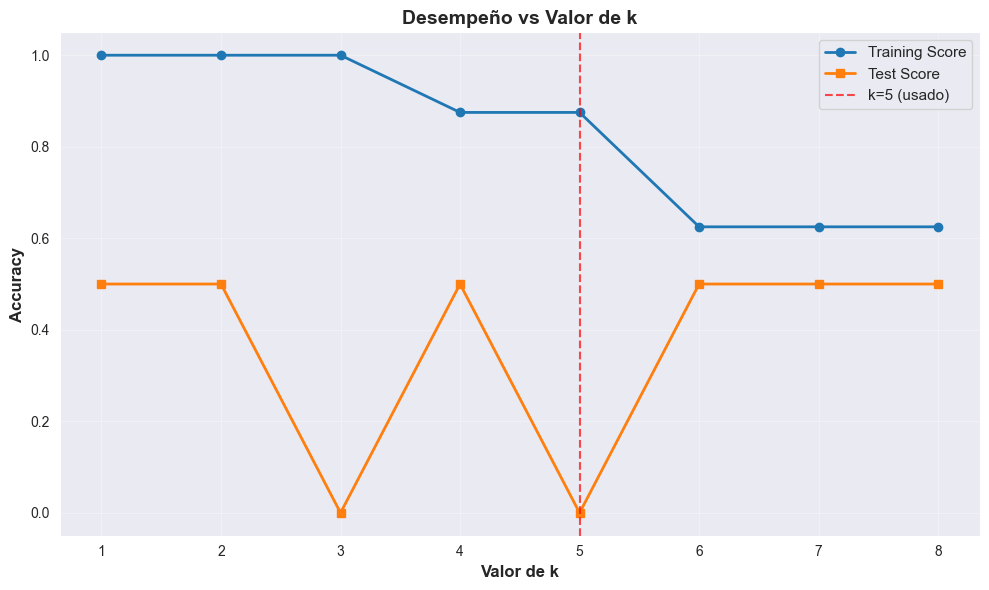

In [41]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

max_k = X_train.shape[0]


k_values = range(1, max_k + 1)
train_scores = []
test_scores = []

for k in k_values:
   
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    train_scores.append(knn_temp.score(X_train, y_train))
    test_scores.append(knn_temp.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(k_values, train_scores, marker='o', label='Training Score', linewidth=2, markersize=6)
ax.plot(k_values, test_scores, marker='s', label='Test Score', linewidth=2, markersize=6)

if 5 <= max_k:
    ax.axvline(x=5, color='r', linestyle='--', label='k=5 (usado)', alpha=0.7)
    
ax.set_xlabel('Valor de k', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Desempeño vs Valor de k', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [42]:
# Guardar modelo
import joblib

joblib.dump(knn_model, '../public/models/knn.pkl')
joblib.dump(scaler, '../public/models/knn_scaler.pkl')

print('Modelo KNN guardado!')
print(f'- Modelo: ../public/models/knn.pkl')
print(f'- Scaler: ../public/models/knn_scaler.pkl')

Modelo KNN guardado!
- Modelo: ../public/models/knn.pkl
- Scaler: ../public/models/knn_scaler.pkl
